In [77]:
# Ejercicio 1: Ecuacion de ondas
# utt = 4uxx

import numpy as np

# Cte de la ecuacion de onda
K = 4
# Paso en x
h = 0.2
# Paso en t
k = 0.1
# Cantidad de pasos en x
N = 5
# Cantidad de pasos en t
M = 5
# Matriz solucion
u = np.zeros((N+1, M+1))

# Condiciones iniciales 
# u(x,0) = sen(pi x)
u[:,0] = [np.sin(np.pi * xi) for xi in np.linspace(0, N*h, N + 1)]
# u(0,t) = u(1,t) = 0
u[0] = 0
u[N] = 0
# ut(x,0) = 0 => ui0 = ui1
u[:,1] = u[:,0]


# ( a1 a2 a3 a4 ) ( uij     )  = v.T * u
#                 ( ui(j-1) )
#                 ( u(i+1)j )
#                 ( u(i-1)j )
v = [ 2 - 2*K*k**2/h**2, -1, 4*k**2/h**2, 4*k**2/h**2 ]

for j in range(1, M):
    for i in range(1, N):
        prev = [ u[i,j], u[i,j-1], u[i+1,j], u[i-1,j] ]
        u[i,j+1] = np.inner(v, prev)

print(np.round(u,3))

t = np.linspace(0, M*k, M+1)
title = f'Solucion a la ecuacion de onda, K = {K}'
anim = Animator()
anim.plot_animation(t, u, title, 100)

[[ 0.     0.     0.     0.     0.     0.   ]
 [ 0.588  0.588  0.363 -0.    -0.363 -0.588]
 [ 0.951  0.951  0.588  0.    -0.588 -0.951]
 [ 0.951  0.951  0.588 -0.    -0.588 -0.951]
 [ 0.588  0.588  0.363  0.    -0.363 -0.588]
 [ 0.     0.     0.     0.     0.     0.   ]]


In [76]:
from matplotlib import animation, rc
import matplotlib.pyplot as plt
from IPython.display import HTML

plt.rcParams['animation.html'] = 'jshtml'


class Animator:
    def __init__(self):
        self.fig, self.ax = plt.subplots()
        self.u_plot, = plt.plot([], [], color='r', LineWidth=2)     
        
    def plot_animation(self, t, u, title, interval):
        self.ax.set_title(title)
        self.t = t
        self.u = u
        anim = animation.FuncAnimation(self.fig, lambda iter: self._update(iter), init_func=lambda: self._init_animation(), frames=len(t), interval=interval)
        display(HTML(anim.to_jshtml()))
        plt.close()
    
    def _init_animation(self):
        self.ax.set_xlim(self.t[0], self.t[-1])
        self.ax.set_ylim( 1.1 * np.amin(self.u), 1.1 * np.amax(np.abs(self.u)))
        return self.u[:0]

    def _update(self, iter):
        self.u_plot.set_data(self.t, self.u[:,iter])
        return self.u_plot

In [78]:
# Ejercicio 2: Ecuacion de calor
# ut = 1/4 uxx

# ut = C * uxx
def heat_equation(C, r, N, M, u0, u0t, uNt):
    # Matriz solucion
    u = np.zeros((N+1, M+1))
    u[:,0] = u0
    u[0] = u0t
    u[N] = uNt
    # ( a1 a2 a3 ) ( uij     )  = v.T * u
    #              ( u(i+1)j )
    #              ( u(i-1)j )
    v = [ 1 - 2*r*C, r*C, r*C ]
    for j in range(0, M):
        for i in range(1, N):
            prev = [ u[i,j], u[i+1,j], u[i-1,j] ]
            u[i,j+1] = np.inner(v, prev)
    return u

# Paso en x
h = 0.2
# Paso en t
k = 0.02
# Cantidad de pasos en x
N = 5
# Cantidad de pasos en t
M = 5
# Condiciones iniciales 
# u(x,0) = 1 - |2x - 1|
u0 = [ 1 - np.abs(2*xi - 1) for xi in np.linspace(0, N*h, N + 1)]
# u(0,t) = u(1,t) = 0
u0t = 0
uNt = 0
# Constante de la ecuacion de calor
C = 0.5
u_ej2 = heat_equation(C, k/h**2, N, M, u0, u0t, uNt)
print(np.round(u_ej2,3))

t_ej2 = np.linspace(0, M*k, M+1)
title_ej2 = f'Solucion a la ecuacion de calor, C = {C}'
anim_ej2 = Animator()
anim_ej2.plot_animation(t_ej2, u_ej2, title_ej2, 500)

[[0.    0.    0.    0.    0.    0.   ]
 [0.4   0.4   0.375 0.344 0.312 0.283]
 [0.8   0.7   0.625 0.562 0.508 0.459]
 [0.8   0.7   0.625 0.562 0.508 0.459]
 [0.4   0.4   0.375 0.344 0.312 0.283]
 [0.    0.    0.    0.    0.    0.   ]]


[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 1.00000000e-02  6.00000000e-02 -1.50000000e-02  4.10000000e-01
  -1.94600000e+00  1.30720000e+01 -8.86740000e+01  6.32891000e+02
  -4.65388100e+03  3.50548080e+04 -2.69058167e+05  2.09683973e+06
  -1.65481347e+07  1.31983909e+08 -1.06218249e+09  8.61475441e+09
  -7.03422899e+10  5.77781412e+11 -4.77077522e+12  3.95772404e+13
  -3.29703985e+14]
 [ 4.00000000e-02  9.00000000e-02  1.40000000e-01 -1.22000000e-01
   2.11500000e+00 -1.45540000e+01  1.11278000e+02 -8.48926000e+02
   6.57571300e+03 -5.15355740e+04  4.08242825e+05 -3.26431031e+06
   2.63165480e+07 -2.13698741e+08  1.74640978e+09 -1.43533089e+10
   1.18564901e+11 -9.83859827e+11  8.1

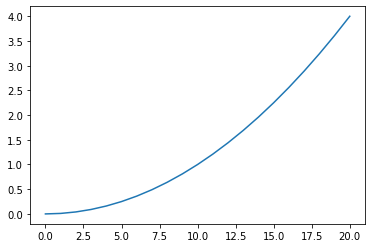

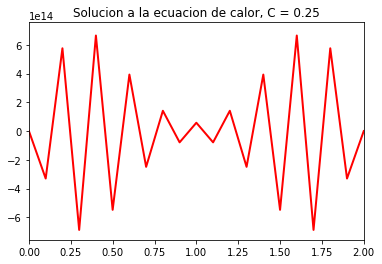

In [66]:
# Ejercicio 3: Ecuacion de calor
# ut = 1/4 uxx

# Paso en x
h = .1
# Paso en t
k = .1
# Cantidad de pasos en x
N = 20
# Cantidad de pasos en t
M = 20

# Condiciones iniciales 
# u(x,0) = x^2
u0 = [ xi**2 for xi in np.linspace(0, N*h, N + 1)]
# u(0,t) = 0
# u(2,t) = 4
u0t = 0
uNt = 4
# Constante de la ecuacion de calor
C = 1/4
u_ej3 = heat_equation(C, k/h**2, N, M, u0, u0t, uNt)
print(np.round(u_ej3,3))
plt.plot(u0)

t_ej3 = np.linspace(0, M*k, M+1)
title_ej3 = f'Solucion a la ecuacion de calor, C = {C}'
anim_ej3 = Animator()
anim_ej3.plot_animation(t_ej3, u_ej3, title_ej3, 100)